# Extract Transform Load (ETL)

In [1]:
import pandas as pd
import numpy as np
import json

### Analizando el archivo output_steam_games.json 

In [2]:
# Se define la ruta del archivo que contiene las reseñas de usuarios australianos en formato JSON.
file_path = r'C:\Users\Coder\Documents\PI_ML_OPS\Datos\output_steam_games.json'

# Se abre el archivo en modo de lectura ('r') con codificación UTF-8.
with open(file_path, 'r', encoding='utf-8') as file:
    # Se crea una lista para almacenar los objetos JSON de cada línea.
    data_list = [json.loads(line) for line in file]

# Se crea un DataFrame de pandas llamado 'dfgames' usando la lista de objetos 'data_list'.
dfgames = pd.DataFrame(data_list)

In [3]:
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


In [4]:
dfgames.sample(10)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
22126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114051,Zoo Corporation,[Casual],Pretty Girls Mahjong Solitaire,Pretty Girls Mahjong Solitaire,http://store.steampowered.com/app/393980/Prett...,2015-08-24,"[Casual, Anime, Mature, Puzzle, Board Game, Nu...",http://steamcommunity.com/app/393980/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",4.99,False,393980,Zoo Corporation
50086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116463,Strategy First,[Strategy],Graviteam Tactics: Shield of the Prophet,Graviteam Tactics: Shield of the Prophet,http://store.steampowered.com/app/326391/Gravi...,2014-10-23,[Strategy],http://steamcommunity.com/app/326391/reviews/?...,"[Single-player, Downloadable Content]",14.99,False,326391,Graviteam
60773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90473,NaN,"[Casual, Simulation]",Rocksmith® 2014 – Mastodon - “Black Tongue”,Rocksmith® 2014 – Mastodon - “Black Tongue”,http://store.steampowered.com/app/294909/Rocks...,2014-05-13,"[Casual, Simulation]",http://steamcommunity.com/app/294909/reviews/?...,"[Single-player, Shared/Split Screen, Downloada...",2.99,False,294909,Ubisoft - San Francisco
119432,Bohemia Interactive,[Simulation],Take On Helicopters,Take On Helicopters,http://store.steampowered.com/app/65730/Take_O...,2011-10-27,"[Simulation, Flight, Open World, TrackIR, Sand...",http://steamcommunity.com/app/65730/reviews/?b...,"[Single-player, Multi-player, Co-op, Captions ...",19.99,False,65730,Bohemia Interactive
69013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfgames[dfgames['id'].duplicated(keep=False)]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88384,NaN,NaN,NaN,NaN,http://store.steampowered.com/,NaN,NaN,NaN,NaN,19.99,False,NaN,NaN
102204,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,False,612880,Machine Games
102883,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/Wolfe...,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,False,612880,Machine Games


Observamos que hay varios duplicados. Procedemos con la eliminación:

In [6]:
dfgames.drop_duplicates(subset='id', keep='first',inplace=True)

In [7]:
dfgames.sample(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
115140,GoodVole,"[Action, Adventure, Indie]",Sandmason,Sandmason,http://store.steampowered.com/app/350620/Sandm...,2015-05-04,"[Indie, Action, Adventure, Puzzle, Building, M...",http://steamcommunity.com/app/350620/reviews/?...,"[Single-player, Multi-player, Steam Achievemen...",3.99,False,350620,GoodVole
94587,Monkeys Tales Studio,"[Adventure, Free to Play, Indie]",The NADI Project,The NADI Project,http://store.steampowered.com/app/474010/The_N...,2016-06-01,"[Free to Play, Adventure, First-Person, Multip...",http://steamcommunity.com/app/474010/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",Free to Play,False,474010,Monkeys Tales Studio
101724,Dev Arc,"[Indie, Simulation, Strategy]",Way of Defector,Way of Defector,http://store.steampowered.com/app/658660/Way_o...,2017-12-12,"[Strategy, Indie, Simulation]",http://steamcommunity.com/app/658660/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",2.99,False,658660,Dev Arc
92468,Ubisoft,"[Action, Strategy]",Toy Soldiers: War Chest - Assassin’s Creed® Pack,Toy Soldiers: War Chest - Assassin’s Creed® Pack,http://store.steampowered.com/app/391433/Toy_S...,2015-08-12,"[Strategy, Action]",http://steamcommunity.com/app/391433/reviews/?...,"[Single-player, Multi-player, Co-op, Shared/Sp...",4.99,False,391433,"Signal Studios,Krome Studios"
101757,Gameloft,"[Free to Play, Massively Multiplayer, RPG, Str...",March of Empires,March of Empires,http://store.steampowered.com/app/702320/March...,2017-12-11,"[Free to Play, Strategy, Massively Multiplayer...",http://steamcommunity.com/app/702320/reviews/?...,"[Online Multi-Player, Steam Achievements, In-A...",Free To Play,False,702320,Gameloft


In [8]:
dfgames.isna().sum()

publisher       8052
genres          3283
app_name           2
title           2050
url                1
release_date    2067
tags             163
reviews_url        1
specs            670
price           1378
early_access       1
id                 1
developer       3299
dtype: int64

In [9]:
#Eliminamos las columnas innecesarias como url, reviews_url, tags, specs, early_access, app_name y:
dfgames = dfgames.drop(['url', 'reviews_url', 'tags', 'specs', 'app_name', 'early_access'], axis=1)

In [10]:
dfgames.sample(5)

,publisher,genres,title,release_date,price,id,developer
100708,Los Exaltados,"[Casual, Indie, Strategy]",Goblins Keep Coming - Tower Defense,2017-11-20,1.99,739850,Los Exaltados
109265,NaN,"[Simulation, Strategy]",Graviteam Tactics: Drive on Voronezh,2016-10-20,4.99,540820,Graviteam
89718,"SEGA, Feral Interactive (Mac), Feral Interacti...",[Strategy],COH 2 - Soviet Skin: (L) Winter Whitewash Voro...,2013-06-24,1.99,231488,"Relic Entertainment,Feral Interactive (Mac),Fe..."
109264,Dovetail Games - Trains,[Simulation],Train Simulator: DB BR 112.1 Loco Add-On,2016-10-20,19.99,376960,virtualRailroads
108940,NaN,"[Casual, Simulation]",Rocksmith® 2014 Edition - Remastered – Poison ...,2016-11-08,2.99,509653,Ubisoft - San Francisco


In [11]:
dfgames.shape

(32133, 7)

Eliminamos los valores nulos del dataframe

In [12]:
dfgames = dfgames.dropna()

In [13]:
dfgames.sample(5)

,publisher,genres,title,release_date,price,id,developer
102507,SEGA,"[Simulation, Sports]",Football Manager Touch 2018 - All Job Applicat...,2017-11-09,0.99,711731,Sports Interactive
89021,"2K Games, Aspyr (Mac, Linux)",[Strategy],Civilization V - Scenario Pack: Wonders of the...,2011-08-11,4.99,99614,"Firaxis Games,Aspyr (Mac, Linux)"
110225,Dovetail Games,[Simulation],TS Marketplace: Gresley Coach Pack 02,2016-08-19,4.99,295205,Matrix Trains
90070,Ubisoft,"[Action, Adventure]",Assassin’s Creed® IV Black Flag™ - Time saver:...,2013-11-19,0.99,260472,Ubisoft Montreal
103320,Bethesda Softworks,"[Action, Adventure]",The Evil Within 2,2017-10-12,59.99,601430,Tango Gameworks


Modificamos la columna relase_date y dejamos sólo el año:

In [14]:
# Primero observamos el formato de la columna:
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22817 entries, 88310 to 120443
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     22817 non-null  object
 1   genres        22817 non-null  object
 2   title         22817 non-null  object
 3   release_date  22817 non-null  object
 4   price         22817 non-null  object
 5   id            22817 non-null  object
 6   developer     22817 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [15]:
#Como la columna esta como tipo object debemos convertirla a formato datetime
dfgames['release_date'] = pd.to_datetime(dfgames['release_date'], errors='coerce')
# Modificamos la fecha para que quede sólo el año
dfgames['release_date'] = dfgames['release_date'].dt.year
dfgames

,publisher,genres,title,release_date,price,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018.0,4.99,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,2018.0,Free To Play,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017.0,Free to Play,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,2017.0,0.99,767400,彼岸领域
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018.0,3.99,772540,Trickjump Games Ltd
...,...,...,...,...,...,...,...
120439,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018.0,1.99,745400,Bidoniera Games
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018.0,1.99,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018.0,4.99,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,2018.0,1.99,610660,Laush Dmitriy Sergeevich


In [16]:
#Verificamos si quedaron valores nulos después de la modificación de la fecha:
dfgames.isna().sum()

publisher        0
genres           0
title            0
release_date    34
price            0
id               0
developer        0
dtype: int64

In [17]:
# Son muy pocos los datos que quedarían como datos NaN entonces los eliminamos:
dfgames = dfgames.dropna()

In [18]:
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22783 entries, 88310 to 120443
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22783 non-null  object 
 1   genres        22783 non-null  object 
 2   title         22783 non-null  object 
 3   release_date  22783 non-null  float64
 4   price         22783 non-null  object 
 5   id            22783 non-null  object 
 6   developer     22783 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


Para la Columna 'price' reemplazamos los registros "Free to play" por cero y cambiamos el tipo de dato de la columna a tipo entero:

In [19]:
def ceros(x):
    try:
        return float(x)
    except:
        return (0)
dfgames['price']= dfgames['price'].apply(ceros)


C:\Users\Coder\AppData\Local\Temp\ipykernel_4736\936743003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames['price']= dfgames['price'].apply(ceros)


In [20]:
dfgames.sample(20)

,publisher,genres,title,release_date,price,id,developer
96513,Brightrock Games,"[Indie, Strategy]",War for the Overworld - Crucible Expansion,2016.0,0.00,492690,Brightrock Games
99634,RBIOKuriboh,"[Adventure, RPG]",岚零之风 - Wind Horizon,2017.0,1.99,700510,RBIOKuriboh
109165,Giant Margarita,[Indie],Party Golf,2016.0,14.99,538550,Giant Margarita
94448,"2K, Feral Interactive (Mac), Feral Interactive...",[Strategy],XCOM 2: Alien Hunters,2016.0,9.99,433090,"Firaxis,Feral Interactive (Mac),Feral Interact..."
98474,Gal Hajaj,"[Indie, Strategy]",Simple RTS,2017.0,4.99,655420,Gal Hajaj
109033,Jonathan Wood,"[Action, Indie, Early Access]",Zero G Arena,2016.0,5.99,467820,Jonathan Wood
93138,Finalspark Gamestudios,"[Adventure, Early Access]",The Lost Island,2015.0,9.99,416260,Finalspark Gamestudios
117268,Devolver Digital,"[Indie, RPG]",Always Sometimes Monsters - Soundtrack,2014.0,4.99,303780,"Vagabond Dog,Laser Destroyer Team"
114090,Buka Entertainment,"[Adventure, Casual, Indie, Simulation, Strategy]",Farm Frenzy Collection,2015.0,19.99,391000,Alawar Entertainment
112922,KISS ltd,[Indie],"1,000 Heads Among the Trees",2015.0,6.99,406730,Aaron Oldenburg


Renombramos la columna 'id' por 'item_id':

In [21]:
dfgames.rename(columns={'id': 'item_id'}, inplace=True)

C:\Users\Coder\AppData\Local\Temp\ipykernel_4736\2248579451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames.rename(columns={'id': 'item_id'}, inplace=True)


In [22]:
dfgames.head()

,publisher,genres,title,release_date,price,item_id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018.0,4.99,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,2018.0,0.00,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017.0,0.00,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,2017.0,0.99,767400,彼岸领域
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018.0,3.99,772540,Trickjump Games Ltd


In [23]:
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22783 entries, 88310 to 120443
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22783 non-null  object 
 1   genres        22783 non-null  object 
 2   title         22783 non-null  object 
 3   release_date  22783 non-null  float64
 4   price         22783 non-null  float64
 5   item_id       22783 non-null  object 
 6   developer     22783 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.4+ MB


In [24]:
dfgames['item_id'] = dfgames['item_id'].astype(int)

C:\Users\Coder\AppData\Local\Temp\ipykernel_4736\2923544475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames['item_id'] = dfgames['item_id'].astype(int)


In [25]:
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22783 entries, 88310 to 120443
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22783 non-null  object 
 1   genres        22783 non-null  object 
 2   title         22783 non-null  object 
 3   release_date  22783 non-null  float64
 4   price         22783 non-null  float64
 5   item_id       22783 non-null  int32  
 6   developer     22783 non-null  object 
dtypes: float64(2), int32(1), object(4)
memory usage: 1.3+ MB


Guardamos el dataframe en un archivo CSV

In [26]:
dfgames.to_csv( r'C:\Users\Coder\Documents\PI_ML_OPS\Datos\games1.csv', index= False, errors='replace')


Creamos un dataframe con el archivo games1.csv:

In [27]:
dfgamesparquet = pd.read_csv(r'C:\Users\Coder\Documents\PI_ML_OPS\Datos\games1.csv')



Guardamos el dataframe 'dfgamesparquet' en un archivo .parquet

In [28]:
dfgamesparquet.to_parquet(r'C:\Users\Coder\Documents\PI_ML_OPS\Datos\games2.parquet')

In [29]:
del dfgamesparquet

# EDA

importamos las librerías

In [38]:
import matplotlib.pyplot as plt


Primero creamos algunos histogramas para tener una idea de la distribución de los datos:

array([[<Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'item_id'}>, <Axes: >]], dtype=object)

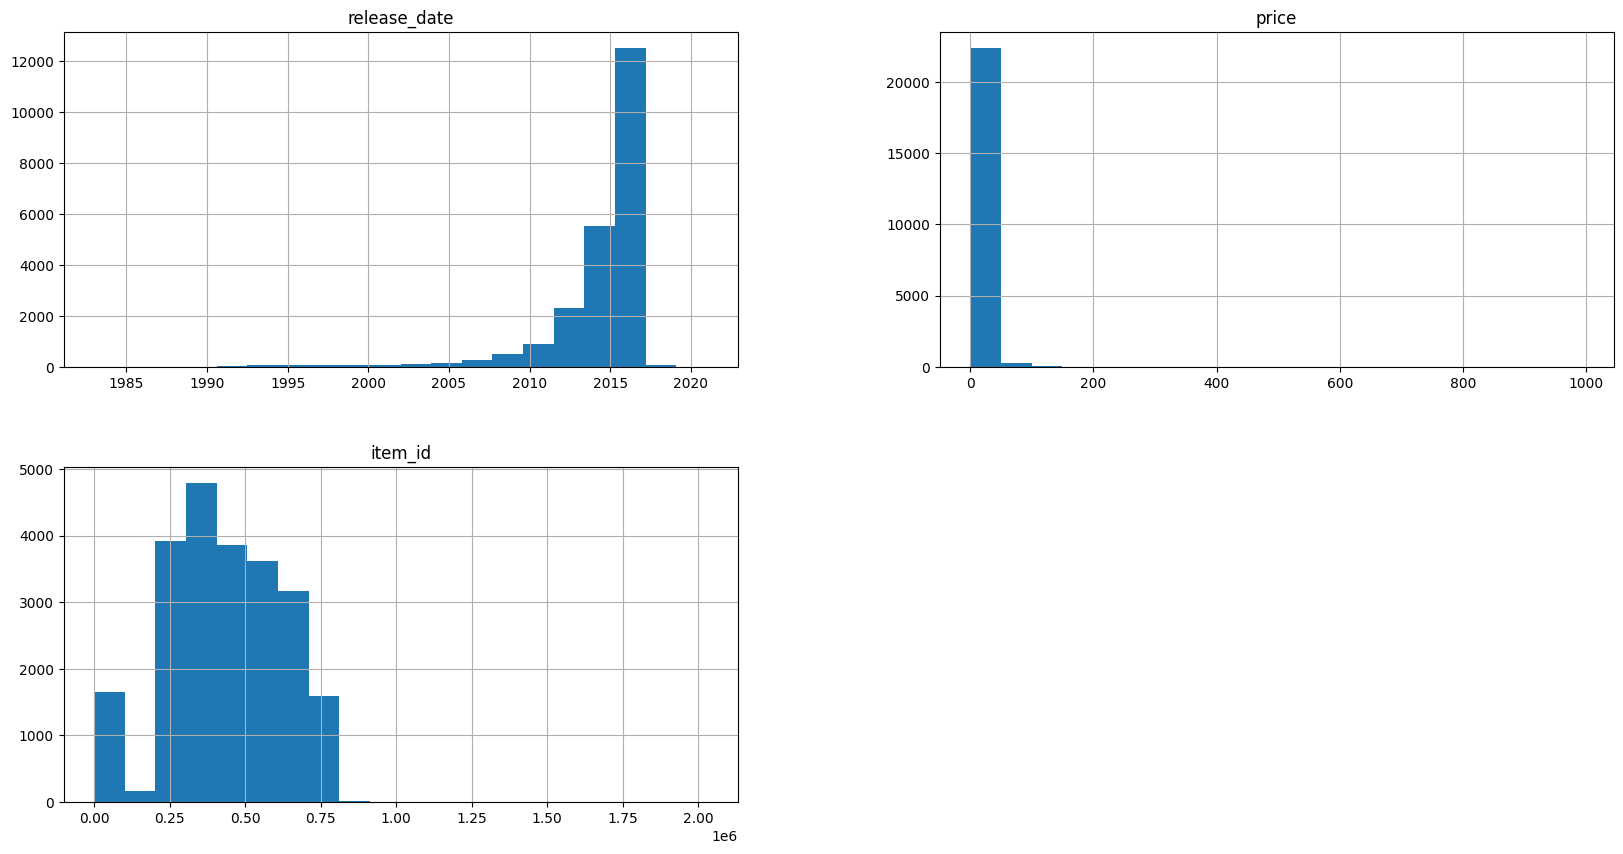

In [30]:
dfgames.hist(bins=20,figsize=(20,10))

Observamos que la mayor cantidad de juegos del dataset fueron lanzados entre 2010 y 2017

Revision de Outliers:

Se realiza un grafico de boxplot para observar si existen valores extremos en la columna 'price'

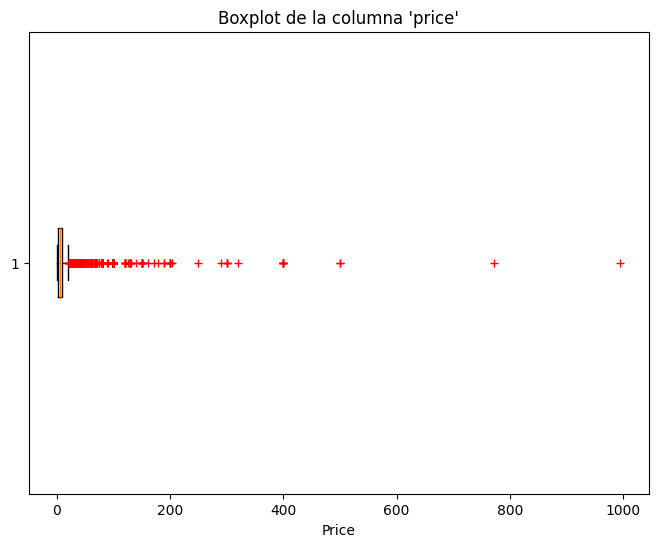

In [40]:
plt.figure(figsize=(8, 6))
plt.boxplot(dfgames['price'], vert=False, sym='r+')
plt.title("Boxplot de la columna 'price'")
plt.xlabel("Price")
plt.show()

Efectivamente se han detectado valores atípicos. Realizamos un gráfico de dispersión:

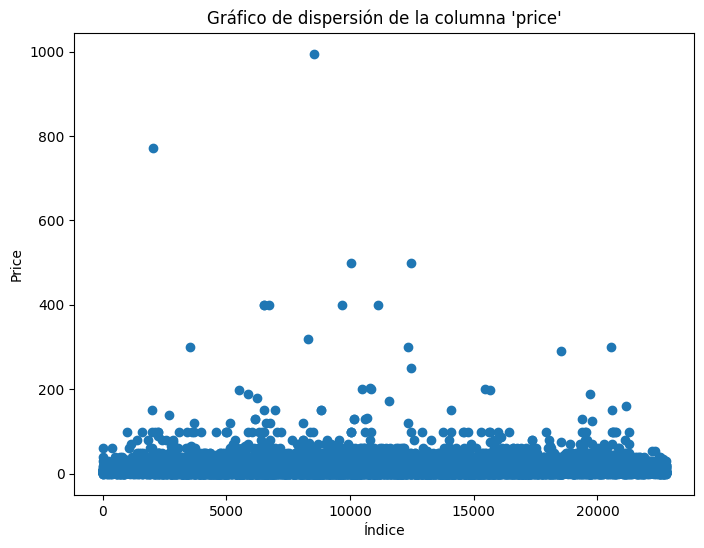

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(dfgames['price'])), dfgames['price'])
plt.title("Gráfico de dispersión de la columna 'price'")
plt.xlabel("Índice")
plt.ylabel("Price")
plt.show()

Ahora analizamos los registros para ver los juegos con los precios más altos:

In [43]:
top_20_expensive_games = dfgames.sort_values(by='price', ascending=False).head(20)
print(top_20_expensive_games[['title', 'price']])

                                                    title   price
100398    Strata Spaces VR – Professional Edition Upgrade  995.00
90702                          X-Plane 10 Global - 64 Bit  771.71
102614  CUR3D Maker Edition - Permission for commercia...  499.99
106104                             EVE Online: 15400 PLEX  499.99
97385                              GameMaker Studio 2 UWP  399.99
97384                           GameMaker Studio 2 Mobile  399.99
102065                   MAGIX Video Pro X9 Steam Edition  399.00
97727                    MAGIX Video Pro X8 Steam Edition  399.00
104156                    VEGAS Pro 15 Edit Steam Edition  399.00
100045                     Marvelous Designer 7 For Steam  320.00
117876             Clickteam Fusion 2.5 Developer Upgrade  299.99
92755                                       MODO indie 10  299.99
105948                          FaceRig Studio - Personal  299.99
115162                  CopperCube - Professional Edition  289.99
106103    

Observamos que los dos valores más altos que el gráfico de dispersión se aproximan a los 1000 USd. Es posible que no se deba a que sean errores en el registro y habría que consultar directamente al desarrollador. 

Grafico de barras

Sería interesante ver la cantidad de juegos creados por desarrollador. Como son muchos, vamos a graficar sólo los diez com mayor cantidad de juegos: 

In [35]:
developer_games = dfgames['developer'].value_counts()
developer_games

developer
Dovetail Games                253
KOEI TECMO GAMES CO., LTD.    179
Ubisoft - San Francisco       178
Capcom                        107
Paradox Development Studio     97
                             ... 
GMGame                          1
Dunfan Lu                       1
x86-Games                       1
绿叶工作室                           1
Bidoniera Games                 1
Name: count, Length: 10364, dtype: int64

In [36]:
developer_games = developer_games.head(10)

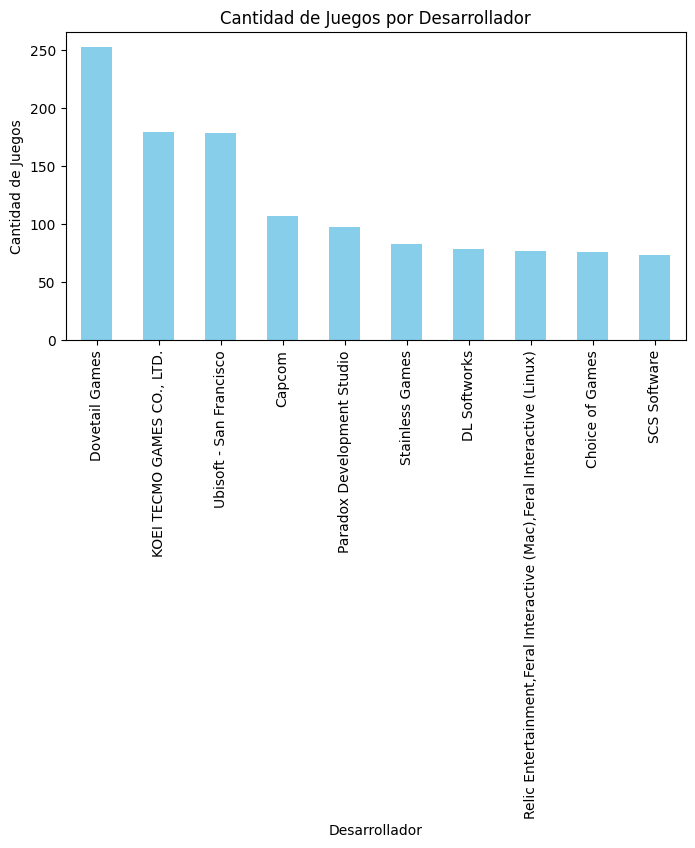

In [39]:
plt.figure(figsize=(8, 4))
developer_games.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Juegos por Desarrollador')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=90)

plt.show()